In [1]:
#data manipulation
import pandas as pd
import numpy as np


#data visualization
import matplotlib.pyplot as plt
import seaborn as sns


#garbage collector
import gc 

In [2]:
train_data = pd.read_feather("jane_street_train.feather")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [4]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


#### weight: Is a scalar that represents how much the stock will produce in profit
#### resp_{1,2,3,4}: Also scalars that represent how the stock will be profitabl in different time horizons (eg. quarter, year,...). rep_j represents the amount of price of the stock from time T_{j-1} to time T_{j}
#### resp: is an aggregated value for the profitablity of the stock

In [5]:
train_data[['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']].describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04
std,1.522746e+02,7.672794e+00,8.930163e-03,1.230236e-02,1.906882e-02,3.291224e-02,2.693609e-02
min,0.000000e+00,0.000000e+00,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01
25%,1.040000e+02,1.617400e-01,-1.859162e-03,-2.655044e-03,-5.030704e-03,-9.310415e-03,-7.157903e-03
50%,2.540000e+02,7.086770e-01,4.552665e-05,6.928179e-05,1.164734e-04,1.222579e-04,8.634997e-05
75%,3.820000e+02,2.471791e+00,2.097469e-03,2.939111e-03,5.466336e-03,9.804649e-03,7.544347e-03
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01


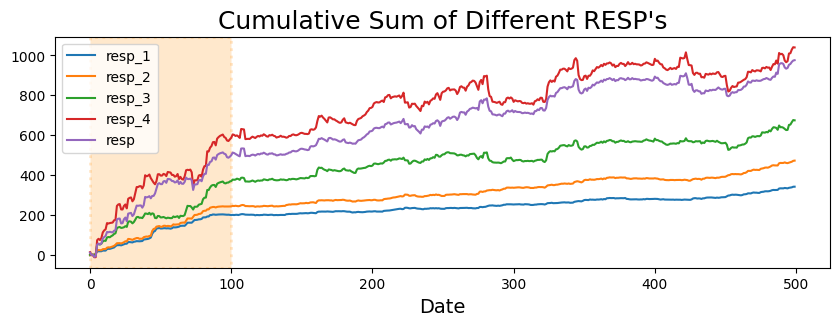

In [6]:
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(1,1,1)
train_data.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']].sum().cumsum().plot(ax=ax)
plt.title('Cumulative Sum of Different RESP\'s',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.axvspan(0,100,linestyle=':',linewidth=2,label='first 92 days',color='darkorange',alpha=.2)


#### The most profit happened in the first 100 days. What we have done is sorting the rows by date and then took the cumulative sun of the different profits over the 4 time horizons. It shows clearly that the most profit is realizable in the long period (resp_4)

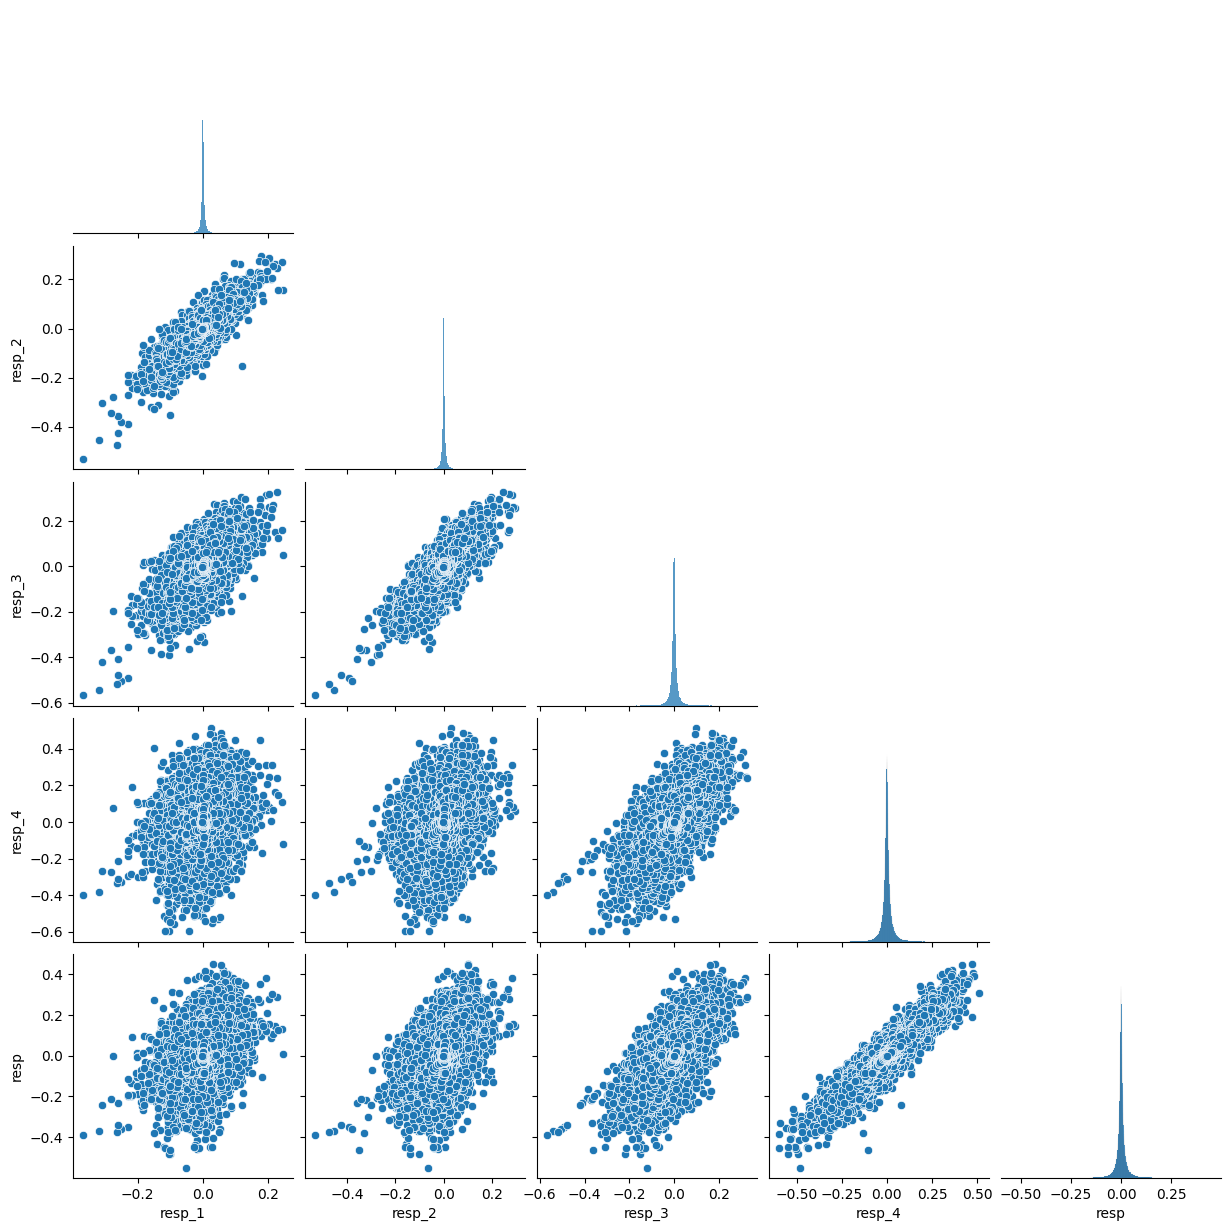

In [7]:
sns.pairplot(train_data[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']],corner=True,  diag_kind="hist")

#### We instead now plotted the mutual correaltion between the different profit estimates on the 1 to 4 time horizons. As it easily could have been inferred from the previous plot there is a strong relationship between the resp feature and the resp_4, similarly there are sstrong relationships between resp_3 and resp_2 and between resp_1 and resp_2. 